## The Data: Pima Indian Classification

### Problem statement 
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided. (Target is column 8)

### Assumptions

This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
Just these attributes are enough to diagnose the ailment
Similar Problems 
This is very much like some common 2 class classification problems like classifying mail into spam and ham based on the contents of the email. Obviously the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

In [342]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [343]:
df = pd.read_csv("diabetes.csv")

In [344]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [345]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [346]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

In [347]:
len(df)

768

In [348]:
sum(df['Outcome'])

268

### Opcional, habría que comprobar

In [349]:
# Normalize the data attributes for the Iris dataset.
from sklearn import preprocessing
# normalize the data attributes
X[['Glucose']] = preprocessing.normalize(X[['Glucose']],axis=0)

/home/joeldela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/joeldela/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [306]:
# Standardize the data attributes for the Iris dataset.
from sklearn import preprocessing
# standardize the data attributes
X[['Age']] = preprocessing.scale(X[['Age']])

/home/joeldela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/joeldela/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Comenzamos ML

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.20)

In [351]:
X_validacion_final, X_test, y_validacion_final, y_test = train_test_split(X_test_aux, y_test_aux, test_size=0.50)

In [352]:
X_cross=X_train.append(X_test)
y_cross=y_train.append(y_test)

### Visualizamos los datos

In [353]:
import seaborn as sns

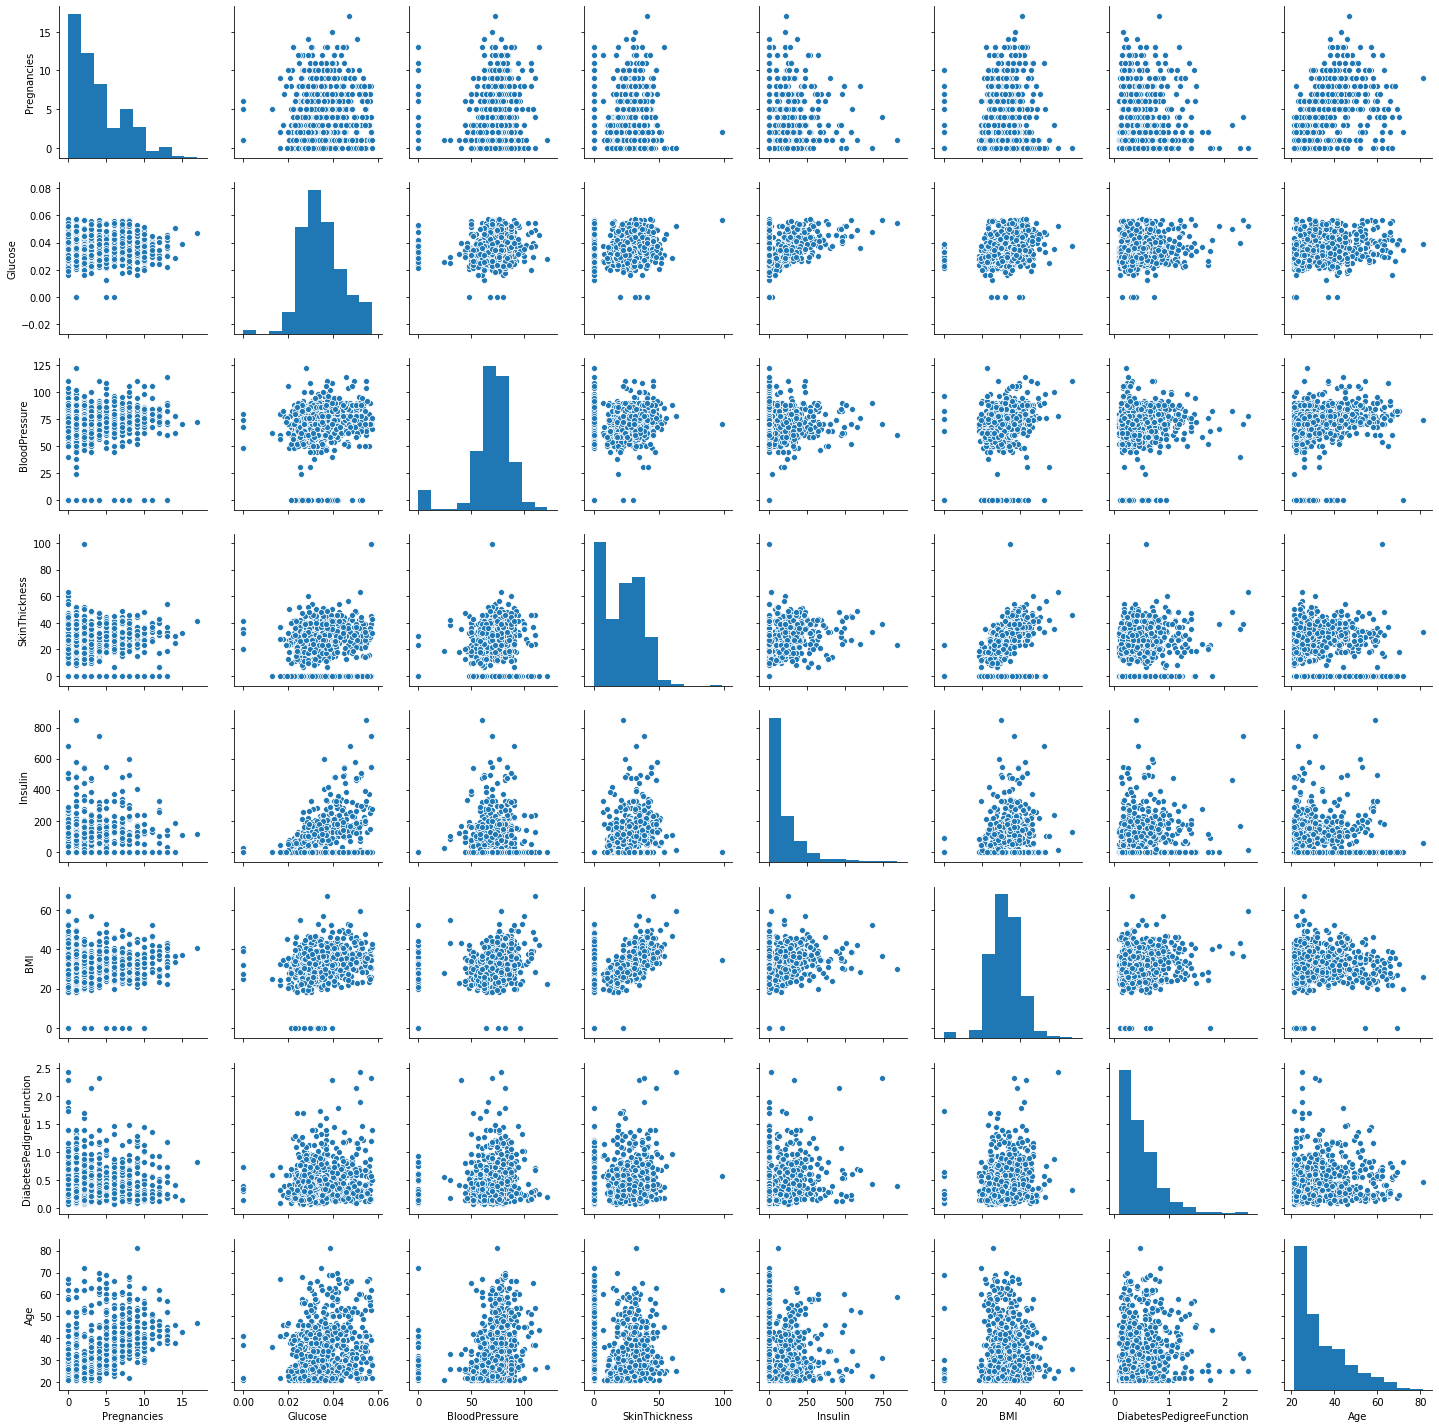

In [354]:
sns.pairplot(X)

In [355]:
from sklearn.linear_model import LogisticRegression

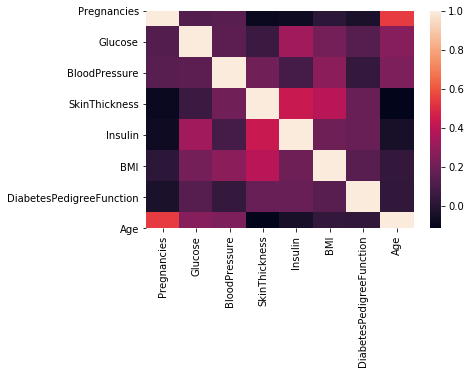

In [356]:
sns.heatmap(X.corr())

### Logistic Regression

In [357]:
from sklearn.linear_model import LogisticRegression

In [358]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Cross Validation

In [359]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg,X_cross,y_cross,cv=4,scoring="accuracy").mean()

/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7048358256347025

### K-vecinos

In [360]:
from sklearn.neighbors import KNeighborsClassifier 
regk = KNeighborsClassifier()

#### GridSearchCV

In [361]:
from sklearn.model_selection import GridSearchCV

clf_k_grid = GridSearchCV(KNeighborsClassifier(),
                       param_grid={"n_neighbors":np.arange(2,30),'weights':['uniform','distance']},scoring='accuracy',cv=3)
# Fit will test all of the combinations
clf_k_grid.fit(X_cross,y_cross)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [362]:
clf_k_grid.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [363]:
clf_k=clf_k_grid.estimator

In [364]:
clf_k.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Cross Validation

In [365]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_k,X_cross,y_cross,cv=3,scoring="accuracy").mean()

0.6497898237028672

### Decision Tree

In [366]:
# Import library
from sklearn.tree import DecisionTreeClassifier
# Create instance
clf_tree = DecisionTreeClassifier(min_samples_leaf=35,max_depth=4)

In [367]:
clf_t_grid=GridSearchCV(clf_tree,param_grid={'min_samples_leaf':np.arange(20,40),'max_depth':np.arange(2,10)},scoring='accuracy')
clf_t_grid.fit(X_train,y_train)

/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=35,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([20, 21, 22

In [368]:
clf_t=clf_t_grid.best_estimator_

In [369]:
clf_t.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [370]:
cross_val_score(clf_t,X_cross,y_cross,cv=3,scoring="accuracy").mean()

0.767018006148441

## Ahora hacemos el Ensemble

In [371]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
clf_rf=RandomForestClassifier(max_depth=3,
                               min_samples_leaf=3,
                               n_estimators=100,
                               n_jobs=-1)

In [373]:
clf_grid_rf=GridSearchCV(clf_rf,param_grid={'max_depth':np.arange(2,10),'min_samples_leaf':np.arange(20,50)},cv=3,scoring='accuracy')

In [374]:
clf_grid_rf.fit(X_cross,y_cross)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn',

In [375]:
clf_rf=clf_grid_rf.best_estimator_

In [376]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [377]:
cross_val_score(clf_grid_rf.best_estimator_,X_cross,y_cross,cv=3,scoring="accuracy").mean()

0.7612460003764352

### Utilizamos el Gradient Boosting

In [378]:
# Load the library
from sklearn.ensemble import GradientBoostingClassifier
# Create an instance
clf_gra = GradientBoostingClassifier(max_depth=4)

In [379]:
params={'min_samples_leaf':np.arange(20,50),'max_depth':np.arange(1,10),'n_estimators':np.arange(100,300),'learning_rate':np.arange(0.01,0.3,0.01)}

```python
clf_grid_gb=GridSearchCV(clf_gra,param_grid=params,cv=3,scoring='accuracy')
clf_grid_gb.fit(X_cross,y_cross)
```

```python
clf_gb=clf_grid_gb.best_estimator_
```

In [380]:
from sklearn.model_selection import RandomizedSearchCV

In [381]:
clf_rand_gb=RandomizedSearchCV(clf_gra,param_distributions=params,cv=3,n_iter=40,scoring='accuracy')
clf_rand_gb.fit(X_cross,y_cross)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [382]:
clf_gb=clf_rand_gb.best_estimator_

In [383]:
clf_gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=34, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [394]:
cross_val_score(clf_gb,X_cross,y_cross,scoring='accuracy').mean()

/home/joeldela/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.774308300395257

### XGBoost

In [395]:
# pip install xgboost

In [396]:
from xgboost import XGBClassifier

In [418]:
# Create an instance
clf_xgb = XGBClassifier()

In [419]:
params={'min_samples_leaf':np.arange(30,60),'max_depth':np.arange(1,20),'n_estimators':np.arange(50,300),'learning_rate':np.arange(0.01,0.3,0.01)}

In [ ]:
clf_grid_xgb=GridSearchCV(clf_gra,param_grid=params,cv=3,scoring='accuracy')
clf_grid_xgb.fit(X_cross,y_cross)


In [ ]:
clf_xgb=clf_grid_xgb.best_estimator_

In [ ]:
clf_xgb.fit(X_train,y_train)

In [ ]:
cross_val_score(clf_xgb,X_cross,y_cross,scoring='accuracy').mean()